<a href="https://colab.research.google.com/github/OptionalLanguor/datasci4health/blob/master/e3_per_recording_bandpower_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compute the average bandpower of an EEG signal
---

One of the most widely used method to analyze EEG data is to decompose the signal into functionally distinct frequency bands, such as delta (0.5–4 Hz), theta (4–8 Hz), alpha (8–12 Hz), beta (12–30 Hz), and gamma (30–100 Hz).

This implies the decomposition of the EEG signal into frequency components, which is commonly achieved through Fourier transforms. The almost invariably used algorithm to compute the Fourier transform (and arguably the most important signal processing algorithm) is the Fast Fourier Transform (FFT), which returns, for each frequency bin, a complex number from which one can then easily extract the amplitude and phase of the signal at that specific frequency. In spectral analysis, it is then common to take the magnitude-squared of the FFT to obtain an estimate of the power spectral density (or power spectrum, or periodogram), expressed in (micro)-Volts2 per Hertz in the case of EEG data.

Although a myriad of analyses can be performed from the power spectral density, I am going to focus here on a very simple one: the average band power, which consists in computing a single number that summarizes the contribution of the given frequency band to the overall power of the signal. This could be particularly useful in a machine-learning approach, when often you will want to extract some keys features from your data (and have a single number that could summarize a particular aspect of your data).


In [1]:
import pandas as pd

commom_path = "https://raw.githubusercontent.com/OptionalLanguor/datasci4health/master/data/external/eeglab_dataset/"
participants_file = "participants.tsv"

url_participants = commom_path + participants_file
participants = pd.read_csv(url_participants, sep="\t")
participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,CTL,NaN,no s2,Female,61
1,sub-002,801,PD,ON,OFF,Female,60
2,sub-003,802,PD,OFF,ON,Male,75
3,sub-004,803,PD,OFF,ON,Female,76
4,sub-005,804,PD,ON,OFF,Male,75


In [2]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    import numpy as np
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [3]:
from google.colab import drive
!pip install mne

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Subject file (1/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-001/ses-01/eeg/sub-001_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


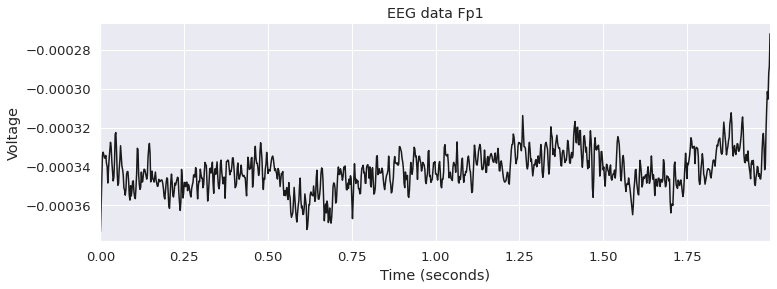

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


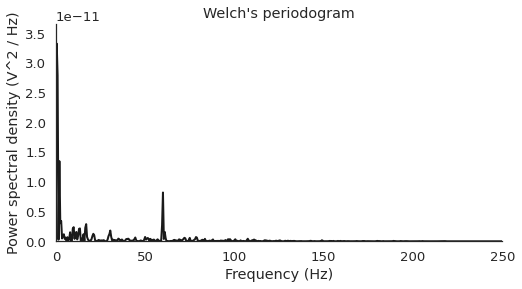

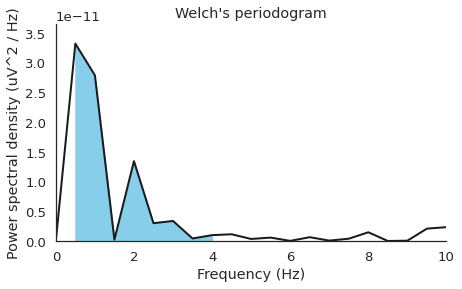

Absolute delta power: 0.00000000003263 uV^2
Relative delta power: 0.406
Subject file (2/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-004/ses-01/eeg/sub-004_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-004/ses-01/eeg/sub-004_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


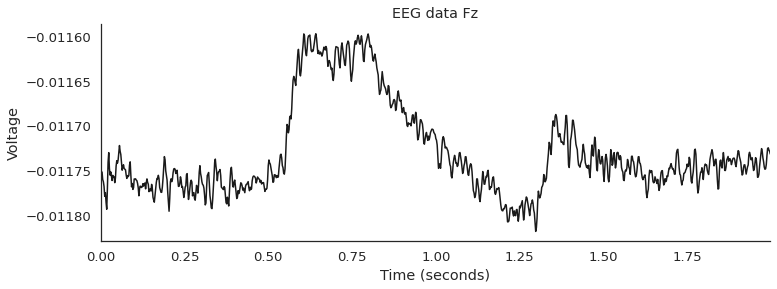

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


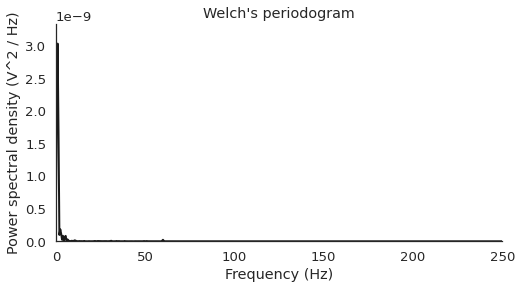

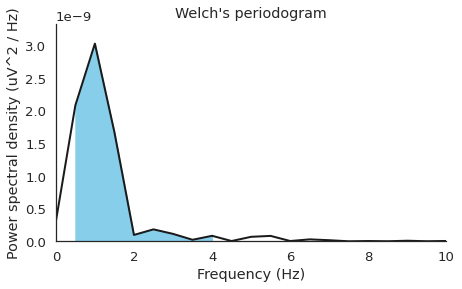

Absolute delta power: 0.00000000314118 uV^2
Relative delta power: 0.779
Subject file (3/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-004/ses-02/eeg/sub-004_ses-02_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-004/ses-02/eeg/sub-004_ses-02_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


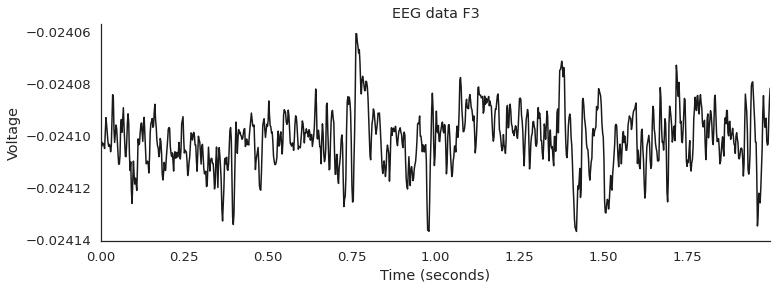

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


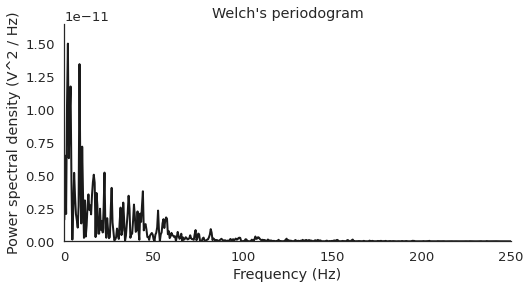

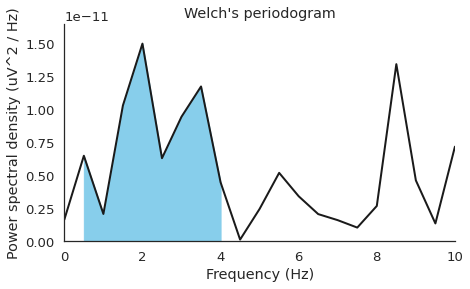

Absolute delta power: 0.00000000003036 uV^2
Relative delta power: 0.213
Subject file (4/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-002/ses-01/eeg/sub-002_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-002/ses-01/eeg/sub-002_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


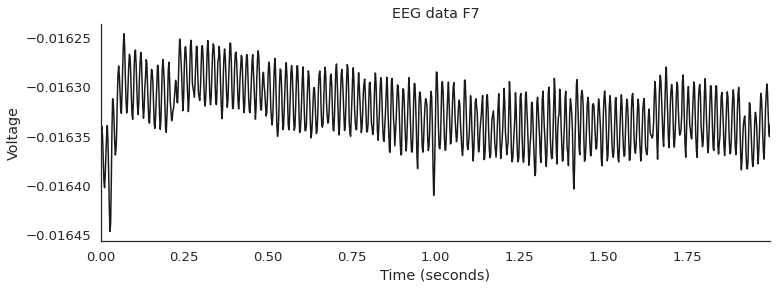

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


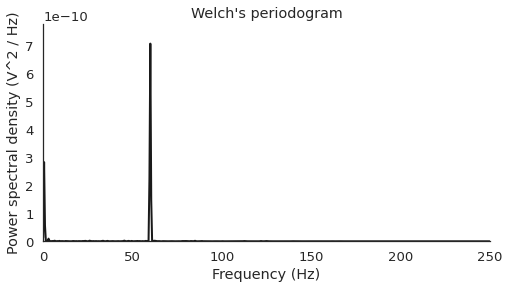

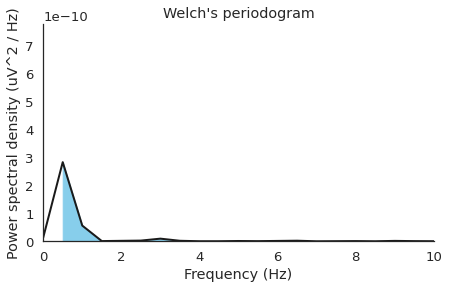

Absolute delta power: 0.00000000009761 uV^2
Relative delta power: 0.128
Subject file (5/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-002/ses-02/eeg/sub-002_ses-02_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-002/ses-02/eeg/sub-002_ses-02_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


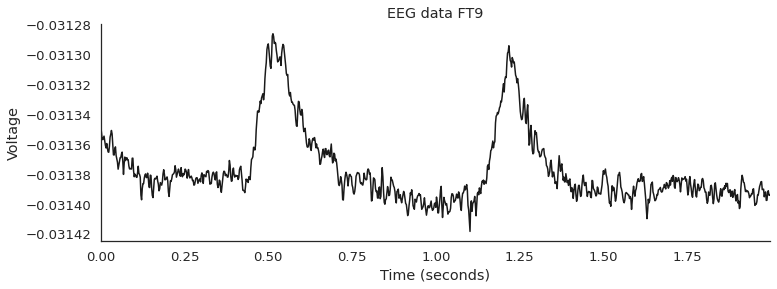

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


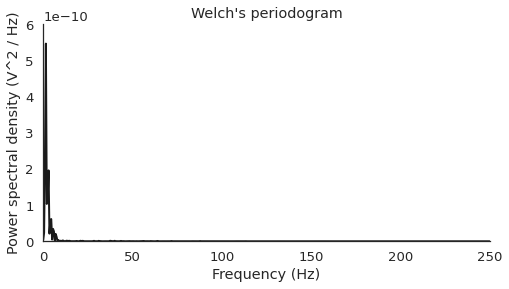

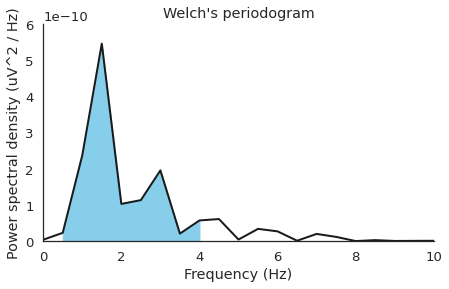

Absolute delta power: 0.00000000063818 uV^2
Relative delta power: 0.803
Subject file (6/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-003/ses-02/eeg/sub-003_ses-02_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-003/ses-02/eeg/sub-003_ses-02_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


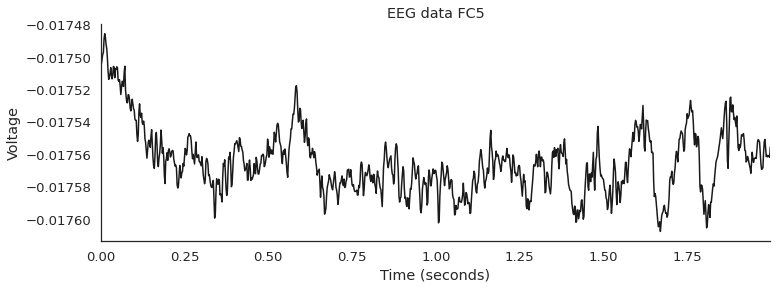

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


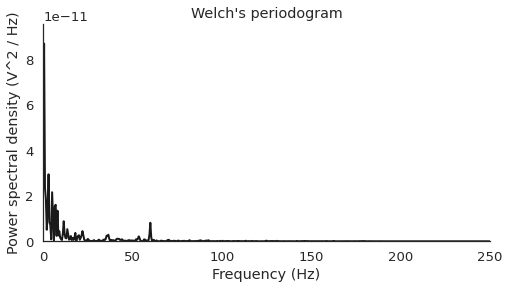

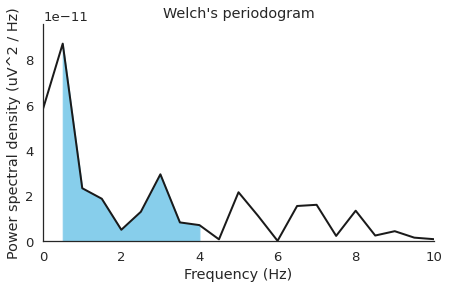

Absolute delta power: 0.00000000006994 uV^2
Relative delta power: 0.312
Subject file (7/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-003/ses-01/eeg/sub-003_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-003/ses-01/eeg/sub-003_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


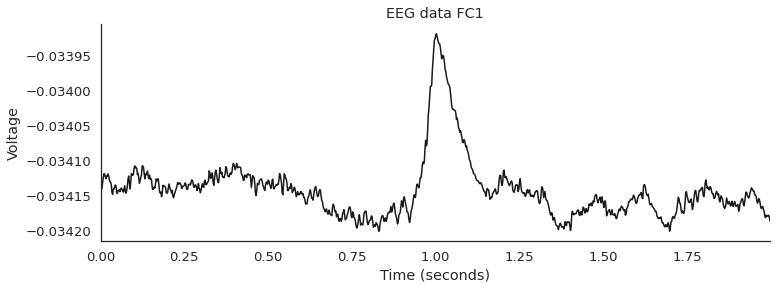

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


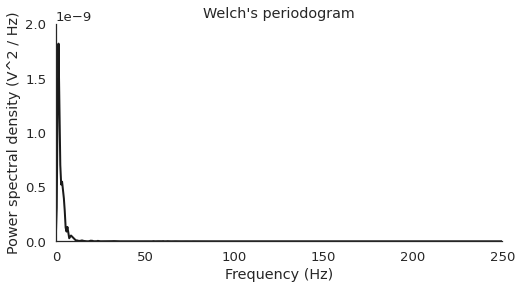

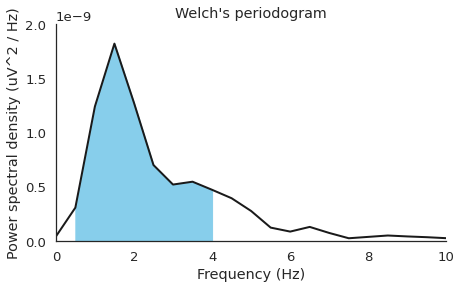

Absolute delta power: 0.00000000329299 uV^2
Relative delta power: 0.780
Subject file (8/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-006/ses-02/eeg/sub-006_ses-02_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-006/ses-02/eeg/sub-006_ses-02_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


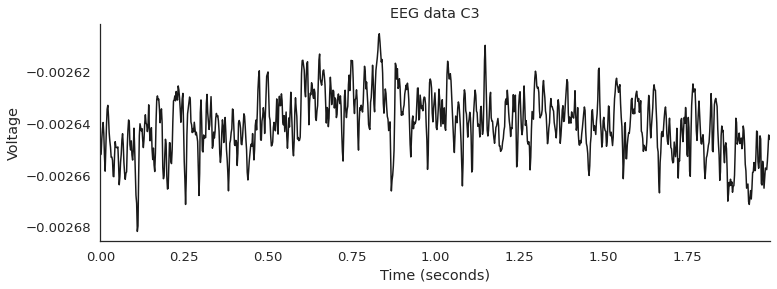

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


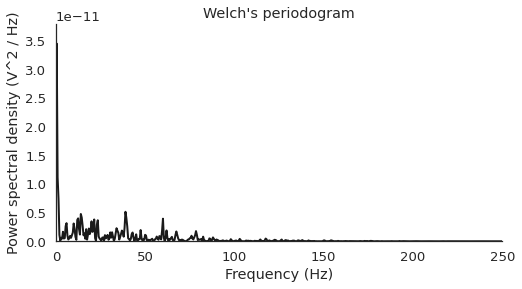

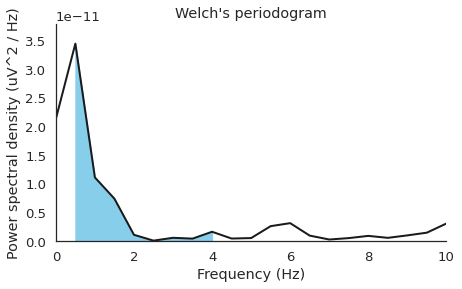

Absolute delta power: 0.00000000001846 uV^2
Relative delta power: 0.149
Subject file (9/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-006/ses-01/eeg/sub-006_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-006/ses-01/eeg/sub-006_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


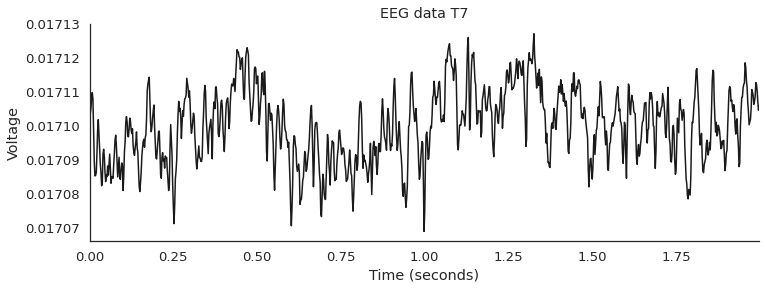

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


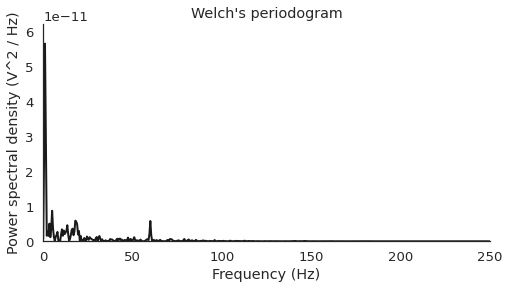

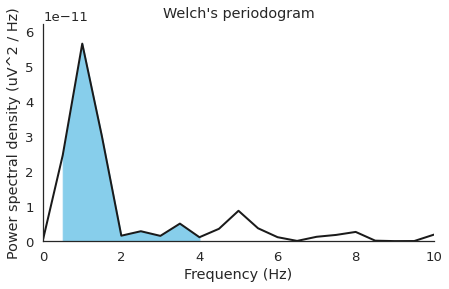

Absolute delta power: 0.00000000005680 uV^2
Relative delta power: 0.430
Subject file (10/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-007/ses-01/eeg/sub-007_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-007/ses-01/eeg/sub-007_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


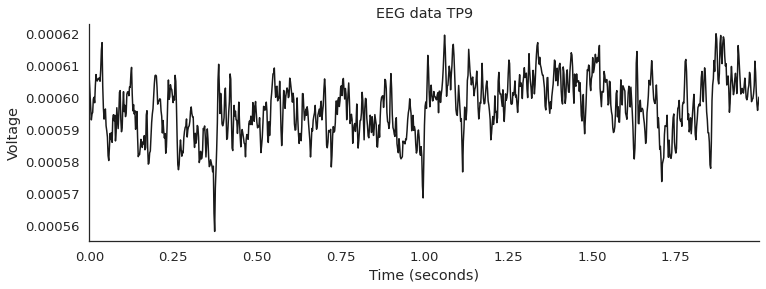

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


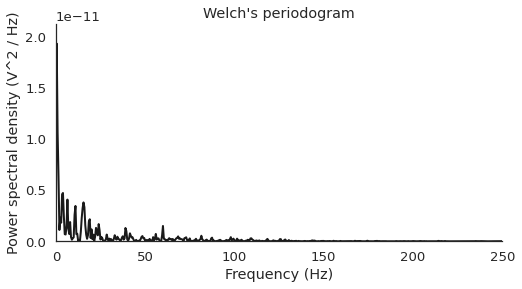

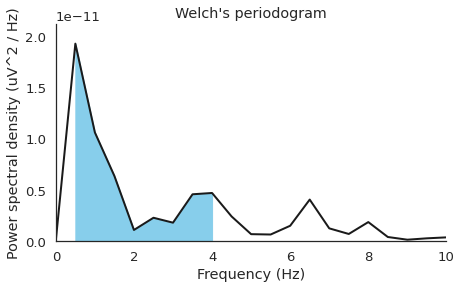

Absolute delta power: 0.00000000001905 uV^2
Relative delta power: 0.264
Subject file (11/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-005/ses-01/eeg/sub-005_ses-01_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-005/ses-01/eeg/sub-005_ses-01_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


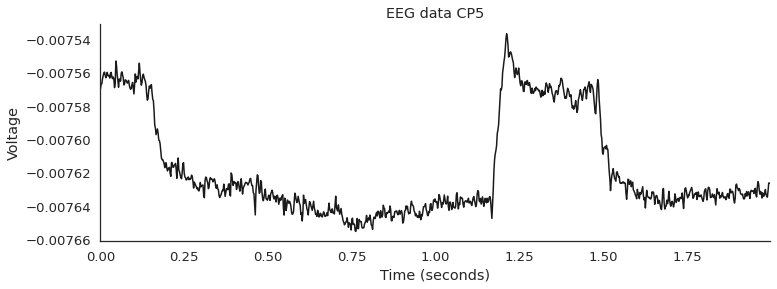

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


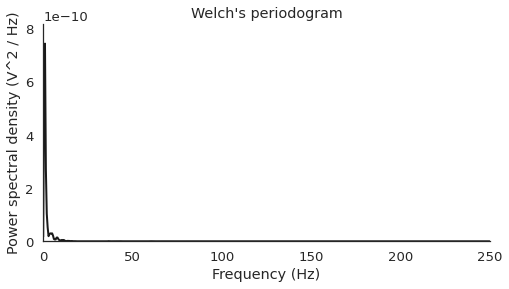

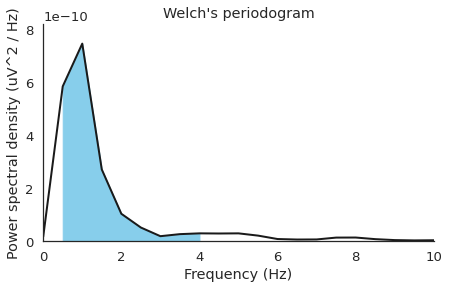

Absolute delta power: 0.00000000076909 uV^2
Relative delta power: 0.749
Subject file (12/12): gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-005/ses-02/eeg/sub-005_ses-02_task-SimonConflict_eeg.set

Reading /content/gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-005/ses-02/eeg/sub-005_ses-02_task-SimonConflict_eeg.fdt


<ipython-input-2-e6d436a2a50b>:14: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  f_raw = mne.io.read_raw_eeglab(each)


Performing BandPower Analysis


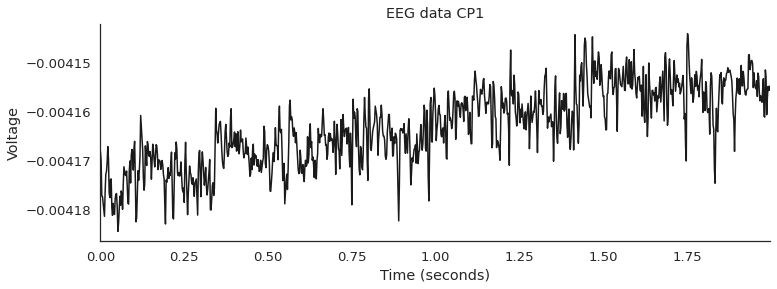

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 2000 is greater than input length  = 1000, using nperseg = 1000
  .format(nperseg, input_length))


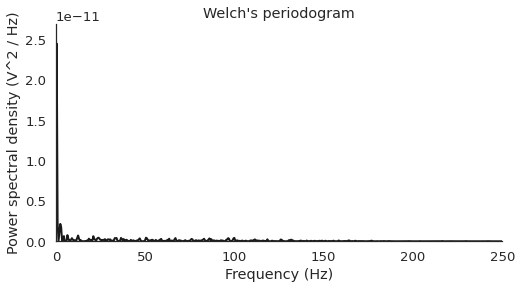

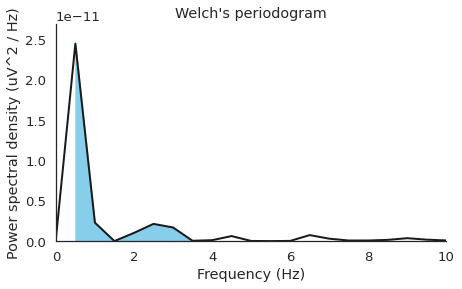

Absolute delta power: 0.00000000000889 uV^2
Relative delta power: 0.237


In [2]:
from glob import glob
from scipy import signal
import matplotlib.pyplot as plt
import mne
import seaborn as sns
sns.set(font_scale=1.2)
import numpy as np

set_files_paths = glob("gdrive/MyDrive/Projeto Final/EEG_Dataset/sub-*/ses-*/eeg/sub-*_ses-*_task-SimonConflict_eeg.set")
len(set_files_paths)

for i, each in enumerate(set_files_paths):
    print(f"Subject file ({i+1}/{len(set_files_paths)}): {each}\n")
    f_raw = mne.io.read_raw_eeglab(each)
    #display(f_raw)
    #f_raw.plot()
    #plt.show()
    print("Performing BandPower Analysis")
    data, times = f_raw[:]
    data = data.reshape(1,-1)[0]
    #delta_power = bandpower(data,500,(.5,4))
    #print('Absolute delta power: %.9f uV^2' % delta_power)

    # Define sampling frequency and time vector
    sf = 500
    data = data[:1000]  # first 1000 samples of the real data
    time = np.arange(data.size) / sf
    channel = f_raw.ch_names[i]
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, data, lw=1.5, color='k')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage')
    plt.xlim([time.min(), time.max()])
    plt.title(f'EEG data {channel}')
    sns.despine()
    plt.show()

    # Define window length (4 seconds)
    win = 4 * sf
    freqs, psd = signal.welch(data, sf, nperseg=win)

    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, freqs.max()])
    sns.despine()
    plt.show()

    # Define delta lower and upper limits
    low, high = 0.5, 4

    # Find intersecting values in frequency vector
    idx_delta = np.logical_and(freqs >= low, freqs <= high)

    # Plot the power spectral density and fill the delta area
    plt.figure(figsize=(7, 4))
    plt.plot(freqs, psd, lw=2, color='k')
    plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (uV^2 / Hz)')
    plt.xlim([0, 10])
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    sns.despine()
    plt.show()


    from scipy.integrate import simps

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

    # Compute the absolute power by approximating the area under the curve
    delta_power = simps(psd[idx_delta], dx=freq_res)
    print('Absolute delta power: %.14f uV^2' % delta_power)

    # Relative delta power (expressed as a percentage of total power)
    total_power = simps(psd, dx=freq_res)
    delta_rel_power = delta_power / total_power
    print('Relative delta power: %.3f' % delta_rel_power)